In [2]:
import pandas as pd
import matplotlib.pyplot as plt  # type: ignore
from matplotlib.patches import Arc  # type: ignore
import seaborn as sns  # type: ignore

In [3]:
chr_len = pd.read_csv('./data_ggbio/0.L_infantum_seq_lengths.csv', sep=',', header=0)
print(chr_len.shape)
print(chr_len.dtypes)
chr_len.rename(columns={'seq_name': 'chr_name', 'seq_length' : 'chr_len'}, inplace=True)
chr_len

(36, 2)
seq_name      object
seq_length     int64
dtype: object


,chr_name,chr_len
0,LinJ.01,278267
1,LinJ.02,356299
2,LinJ.03,389657
3,LinJ.04,466507
4,LinJ.05,467714
5,LinJ.06,525234
6,LinJ.07,592866
7,LinJ.08,515747
8,LinJ.09,581924
9,LinJ.10,588579


In [4]:
sider_elems = pd.read_csv('./data_ggbio/positive_data_named.csv', sep=',', header=0)
print(sider_elems.shape)
print(sider_elems.dtypes)
sider_elems

(2117, 6)
sseqid     object
sstart      int64
send        int64
sstrand    object
sseq       object
new_IDs    object
dtype: object


,sseqid,sstart,send,sstrand,sseq,new_IDs
0,LinJ.01,1,173,plus,ACACCAGTACACCAGTACACCAGTACACCAGTACACCAGTACACCA...,sre_c01.10
1,LinJ.01,24093,24758,plus,GGGGGAGGCGGGGGAGGCGGGGGGCACGCACCTCCATGCGTGGCAT...,sre_c01.20A
2,LinJ.01,35371,35956,plus,ACTCCCATCGCCTGGTGCGAAGCAGCGCAAGACACACGCGCGCTGC...,sre_c01.30A
3,LinJ.01,39790,40595,plus,ATTCTACCGCGAGCAAGGCAGCACACAGACGCACGCACAGCCACAG...,sre_c01.40
4,LinJ.01,54983,55547,plus,ACTCTCATCGCCTGGTGCGAAGCAGCGCAAGACACACGCGCGCTGC...,sre_c01.50A
...,...,...,...,...,...,...
2112,LinJ.36,2659025,2659234,plus,CCAGACGATGACCGGCCACCTCACCGTGGTAGCCGGGTCCAGTATC...,sre_c36.1530AK
2113,LinJ.36,2659310,2660006,plus,GCGCATGCCGAGCACCGCTGGCATGTGGTGTGCCGCATCCGACCGA...,sre_c36.1540AI
2114,LinJ.36,2664855,2665070,plus,TAGAACACGAGTTCCACTCCACGCTACAGCCGCCCTGCCACAGGCC...,sre_c36.1550AL
2115,LinJ.36,2692166,2692514,plus,CAGGCTCCCATCACACCAGCGGCCAGTGAGGCGGCCCAAGGAGGTA...,sre_c36.1560AL


In [5]:
# rename columns
sider_elems.rename(columns={'sseqid': 'chr_name', 'sstart': 'start', 'send': 'end', 'sseq': 'seq', 'new_IDs': 'sider_name'}, 
                  inplace=True
)

# Remove column 'sstrand' 
sider_elems.drop(columns=['sstrand'], inplace=True)


In [6]:

# Let's create in `sider_elems` another column called `family` with the last letter from 'sider_name', using regex
sider_elems['family'] = sider_elems['sider_name'].str.extract(r'([A-Z]+$)')
sider_elems

,chr_name,start,end,seq,sider_name,family
0,LinJ.01,1,173,ACACCAGTACACCAGTACACCAGTACACCAGTACACCAGTACACCA...,sre_c01.10,NaN
1,LinJ.01,24093,24758,GGGGGAGGCGGGGGAGGCGGGGGGCACGCACCTCCATGCGTGGCAT...,sre_c01.20A,A
2,LinJ.01,35371,35956,ACTCCCATCGCCTGGTGCGAAGCAGCGCAAGACACACGCGCGCTGC...,sre_c01.30A,A
3,LinJ.01,39790,40595,ATTCTACCGCGAGCAAGGCAGCACACAGACGCACGCACAGCCACAG...,sre_c01.40,NaN
4,LinJ.01,54983,55547,ACTCTCATCGCCTGGTGCGAAGCAGCGCAAGACACACGCGCGCTGC...,sre_c01.50A,A
...,...,...,...,...,...,...
2112,LinJ.36,2659025,2659234,CCAGACGATGACCGGCCACCTCACCGTGGTAGCCGGGTCCAGTATC...,sre_c36.1530AK,AK
2113,LinJ.36,2659310,2660006,GCGCATGCCGAGCACCGCTGGCATGTGGTGTGCCGCATCCGACCGA...,sre_c36.1540AI,AI
2114,LinJ.36,2664855,2665070,TAGAACACGAGTTCCACTCCACGCTACAGCCGCCCTGCCACAGGCC...,sre_c36.1550AL,AL
2115,LinJ.36,2692166,2692514,CAGGCTCCCATCACACCAGCGGCCAGTGAGGCGGCCCAAGGAGGTA...,sre_c36.1560AL,AL


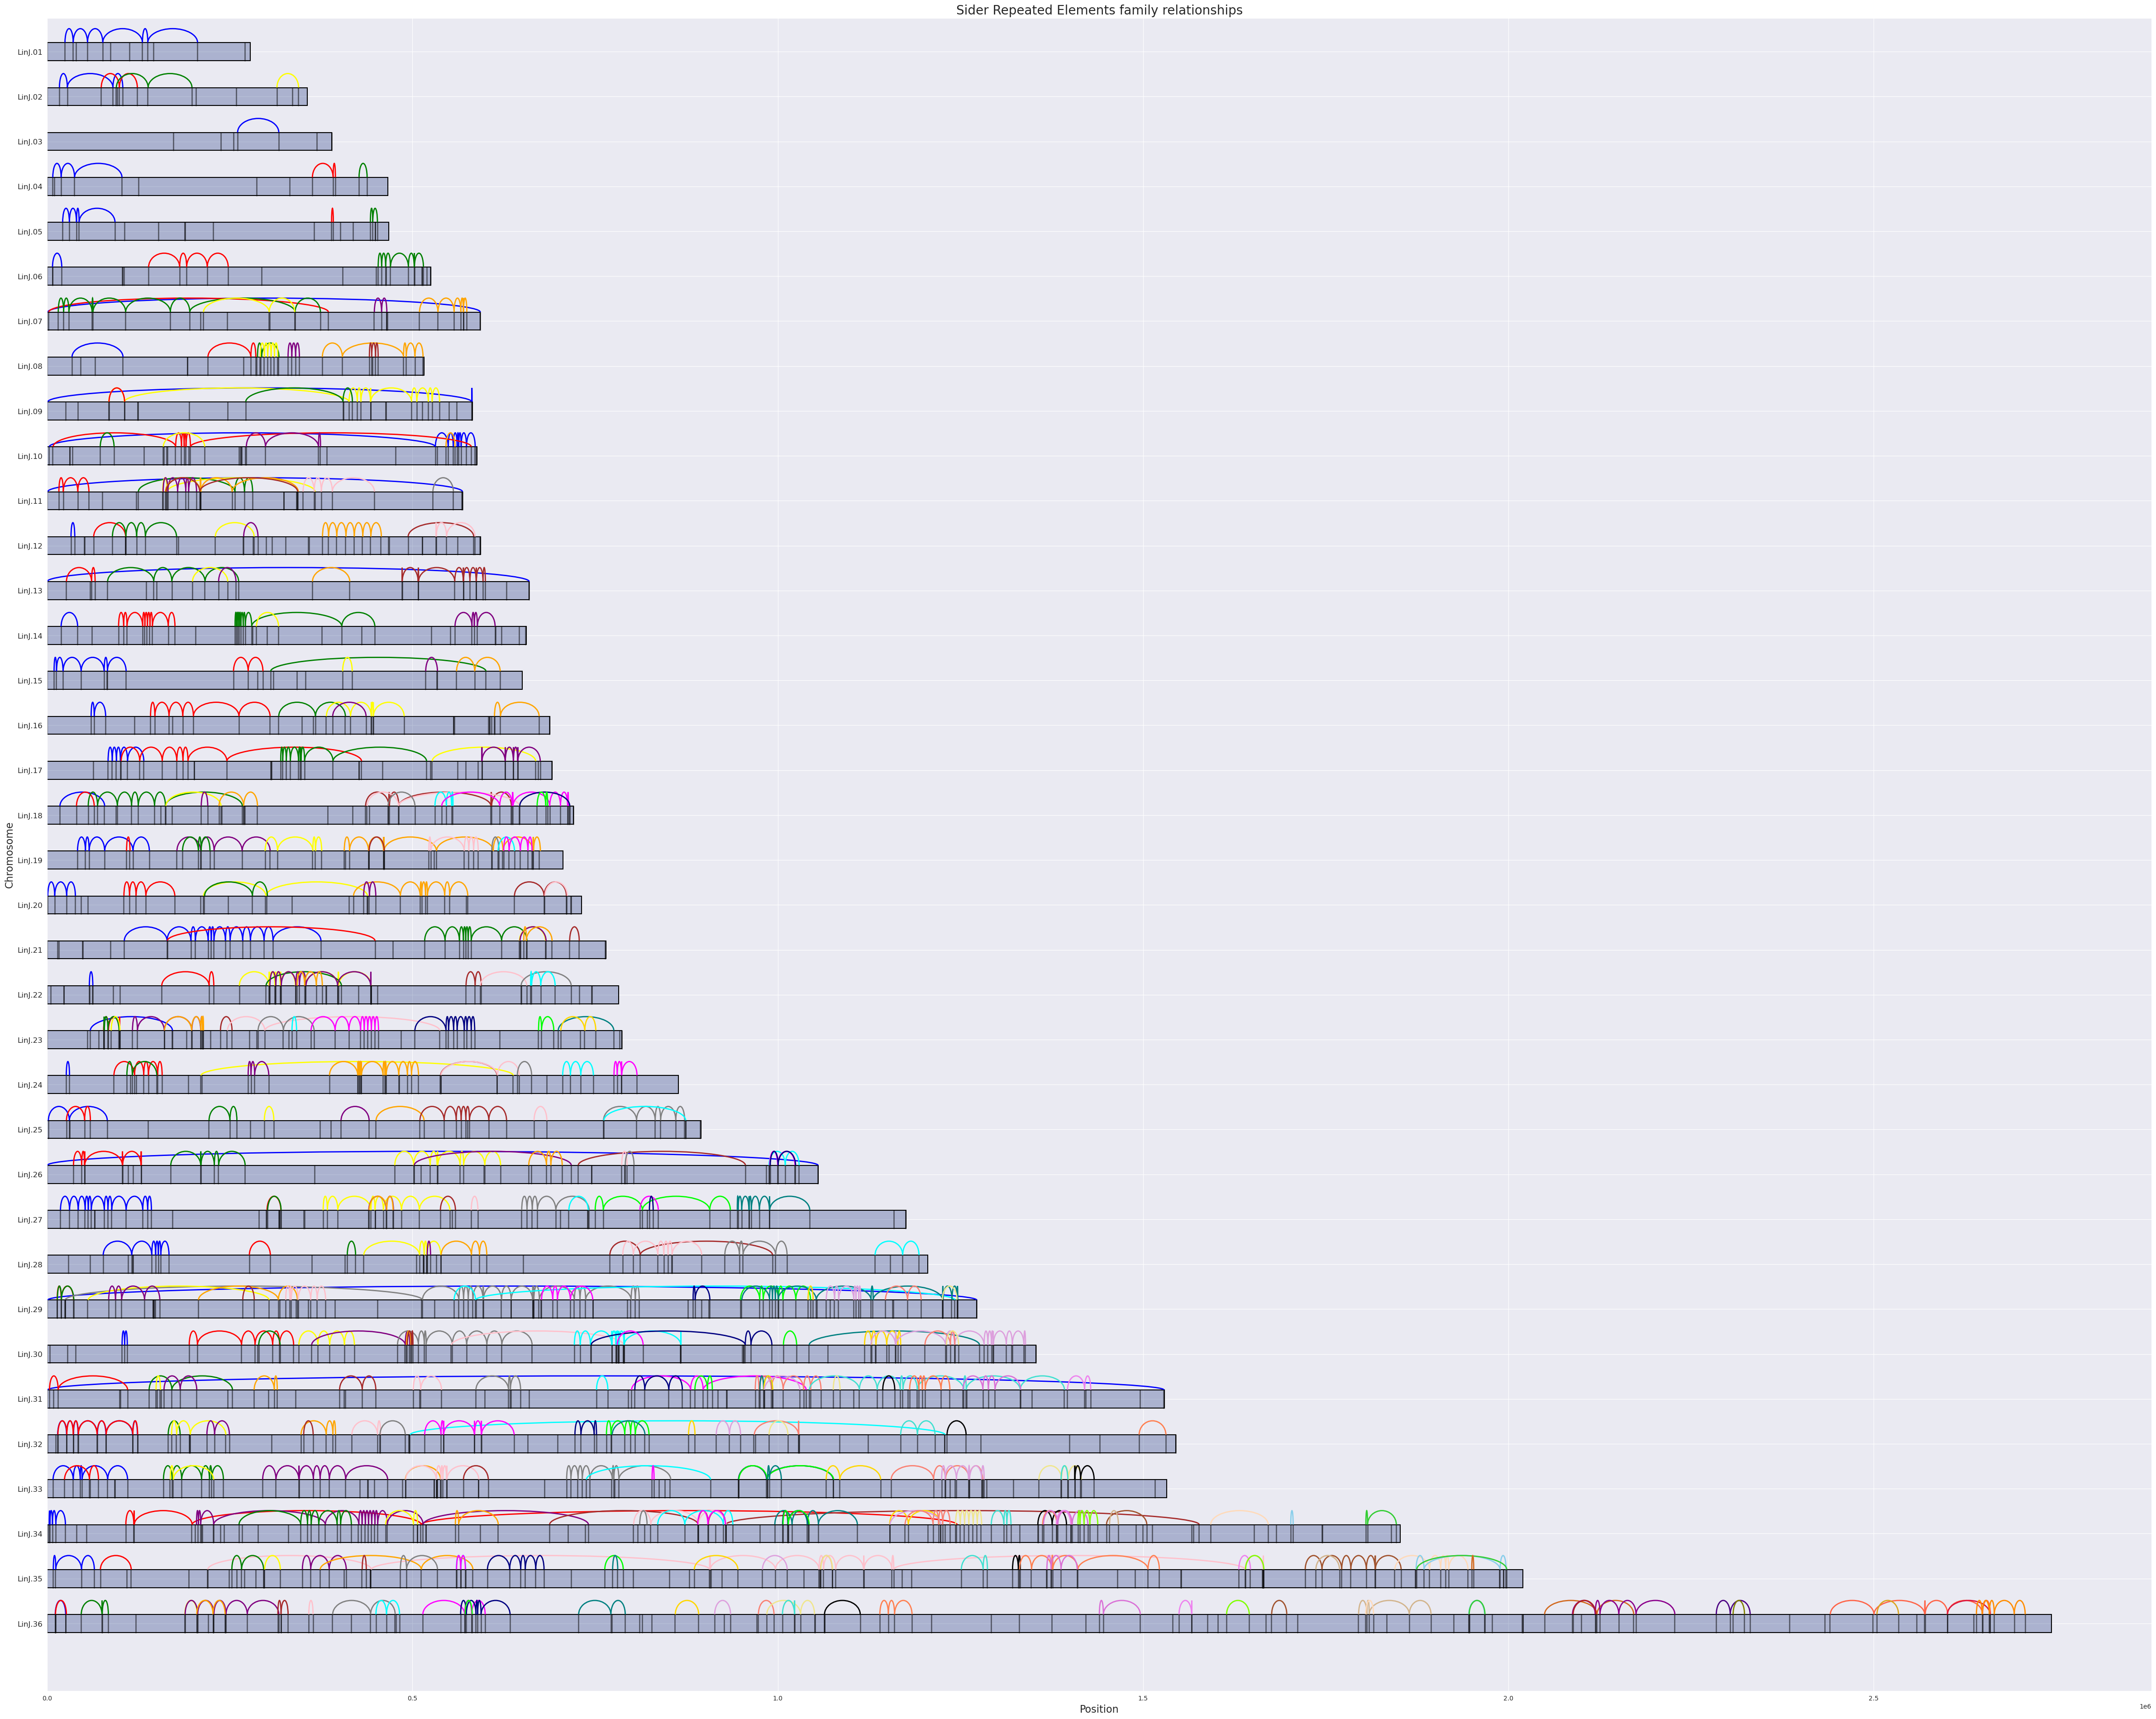

There are a total of 402 families and 502 orphan elements.


In [8]:
plt.figure(figsize=(60, 48), dpi=100)  # Creating a larger figure plot with higher DPI

# Make space between bars by increasing number of y ticks and setting their positions
ytick_labels = chr_len['chr_name'].tolist()

yticks = range(len(ytick_labels) * 2, 0, -2)  # Double the space by multiplying by 2

barplot = plt.barh(
    yticks,
    chr_len['chr_len'],
    tick_label=ytick_labels,
    color=(0.1, 0.2, 0.5, 0.3),
    edgecolor='black',  # Border color
    linewidth=1.5  # Border width
)

plt.ylabel('Chromosome', fontsize=16)
plt.yticks(yticks, ytick_labels, fontsize=12)  # Set new y-tick positions with labels

# Obtain the new y-coordinate locations for the bars
y_coords = yticks

# Height of vertical marker lines (adjusted for new spacing)
bar_height = plt.gca().patches[0].get_height()

# Create a dict with the data frame where keys are the chr name, and the values a list with the location, and family name as well
element_locations = {}
for index, row in sider_elems.iterrows():
    element_locations.setdefault(row['chr_name'], []).append((row['start'], row['end'], row['family']))

# Use a more distinct color palette
distinct_colors = [
    'blue', 'red', 'green', 'yellow', 'purple', 'orange', 'brown', 'pink',
    'gray', 'cyan', 'magenta', 'navy', 'lime', 'teal', 'gold', 'plum',
    'salmon', 'khaki', 'turquoise', 'black', 'coral', 'orchid', 'violet', 'chartreuse',
    'sienna', 'tan', 'peachpuff', 'skyblue', 'limegreen', 'chocolate', 'darkmagenta', 'firebrick',
    'indigo', 'olive', 'tomato', 'goldenrod', 'crimson', 'darkorange', 'lawngreen', 'darkviolet',
    'steelblue', 'lightsalmon', 'darkslateblue', 'mediumseagreen', 'deepskyblue', 'thistle'
]
unique_families = sider_elems['family'].dropna().unique()
color_map = {family: color for family, color in zip(unique_families, distinct_colors)}

# Total family counter 
family_counter = 0

# Total orphans:
orphan_counter = 0


# Plot vertical lines and relationships within each chromosome
for chromosome, locations in element_locations.items():
    y = chr_len.index[chr_len['chr_name'] == chromosome].tolist()[0]  # Adjust for new y-tick spacing
    y_value = y_coords[y]
    
    # Create vertical lines as tall as the chromosome bars
    for (start, end, family) in locations:
        plt.plot([start, start],  # In the X-axis it starts and ends in the same spot.
                 [y_value - bar_height / 2, y_value + bar_height / 2],
                 color=(0, 0, 0, 0.5),  # Include alpha transparency
                 linewidth=2.0  # Increase the line-width
                 )

    # Draw relationships as arcs within each chromosome
    relationships = {}
    for (start, end, family) in locations:
        if not pd.isnull(family):
            relationships.setdefault(family, []).append((start + end) / 2)
        else:  # if family is "null"
            orphan_counter += 1
    
    family_counter += len(relationships)

    for family, positions in relationships.items():
        for i in range(len(positions) - 1):
            start = positions[i]
            end = positions[i + 1]
            center_x = (start + end) / 2
            width = abs(end - start)
            height = 1.25  # Adjust the height for better visualization
            arc = Arc((center_x, y_value + bar_height / 2), width, height, angle=0, theta1=0, theta2=180, color=color_map[family], linewidth=2.0)
            plt.gca().add_patch(arc)

# Adjust the y-axis limits to allow space for the new spacing
plt.ylim(-1, max(yticks) + 1.5)

# Add legend
legend_patches = [plt.Line2D([0], [0], color=color_map[family], lw=4) for family in unique_families]
# plt.legend(legend_patches, unique_families, bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12, title='Families')

plt.xlabel('Position', fontsize=16)
plt.title('Sider Repeated Elements family relationships', fontsize=20)
plt.show()


print(f'There are a total of {family_counter} families and {orphan_counter} orphan elements.')